In [1]:
# Pesquisa em largura (Breadth-First Search, BFS)

# A pesquisa em largura é um tipo diferente de algoritmo, pois utiliza grafos. 
# Este algoritmo ajuda a responder a dois tipos de pergunta:
# 1: Existe algum caminho do vértice A até o vértice B?
# 2: Qual o caminho mais curto do vértice A até o vértice B?

# Pseudo-código para o BFS:
# 1. Adicione o vértice para iniciar a pesquisa pela primeira vez em uma fila vazia.
# 2. Marque esse vértice como visitado.
# 3. Extraia um vértice da fila e adicione seus vizinhos à fila, se não estiverem marcados como visitado.
# 4. Repita a etapa 2 até que a fila esteja vazia.

In [2]:
# Criação do Grafo e implementação do Algoritmo BFS

# Função para criar um grafo padrão
from collections import defaultdict

# Esta classe representa um grafo direcionado usando representação de lista de adjacências
class Grafo:
    # Construtor
    def __init__(self):
        # Dicionário padrão para armazenar o grafo
        self.graph = defaultdict(list)
    # Função para adicionar uma aresta ao grafo
    def addEdge(self, u, v):
        self.graph[u].append(v)
    # Função para o algoritmo BFS
    def BFS(self, s):
        # Marque todos os vértices como não visitados
        visited = [False] * (len(self.graph))
        # Crie uma fila para o BFS
        queue = []
        # Marque o nó de origem 's' como visitado e inclua na fila
        queue.append(s)
        visited[s] = True
        while queue:
            # Remova um vértice da fila e imprima
            s = queue.pop(0)
            print (s, end = " ")
            # Obter todos os vértices adjacentes do vértices desenfileirados.
            # Se um adjacente não foi visitado, marque-o visitado e inclua na fila
            for i in self.graph[s]:
                if visited[i] == False:
                    queue.append(i)
                    visited[i] = True

In [3]:
# Cria uma instância da classe, construindo um grafo com diversas arestas
g = Grafo()
g.addEdge(0, 1)
g.addEdge(0, 2)
g.addEdge(1, 2)
g.addEdge(2, 0)
g.addEdge(2, 3)
g.addEdge(3, 3)

In [4]:
# Executa o algoritmo BFS
print ("Aqui está o caminho a seguir para atravessar o grafo (começando do vértice 2):")
g.BFS(2)

Aqui está o caminho a seguir para atravessar o grafo (começando do vértice 2):
2 0 3 1 

In [5]:
# Exemplos do site: https://eddmann.com/posts/depth-first-search-and-breadth-first-search-in-python/

graph = {'A': set(['B', 'C']),
         'B': set(['A', 'D', 'E']),
         'C': set(['A', 'F']),
         'D': set(['B']),
         'E': set(['B', 'F']),
         'F': set(['C', 'E'])}

In [6]:
# O que vamos fazer é:

# 1. Marque o vértice atual como sendo visitado.
# 2. Explore cada vértice adjacente que não está incluído no conjunto visitado.

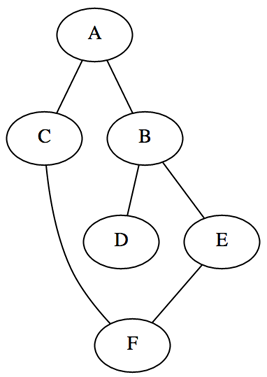

In [7]:
# Abaixo a imagem (graph) criado com o código acima
from IPython.display import Image
Image(filename='graph.png')

In [8]:
def dfs(graph, start):
    visited, stack = set(), [start]
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

In [9]:
dfs(graph, 'A') # {'E', 'D', 'F', 'A', 'C', 'B'}

{'A', 'B', 'C', 'D', 'E', 'F'}

In [10]:
# Faz o mesmo que a função acima
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    for next in graph[start] - visited:
        dfs(graph, next, visited)
    return visited

In [11]:
dfs(graph, 'C') # {'E', 'D', 'F', 'A', 'C', 'B'}

{'A', 'B', 'C', 'D', 'E', 'F'}

In [12]:
# Retorna todos os caminhos possíveis entre um vértice inicial e objetivo
def dfs_paths(graph, start, goal):
    stack = [(start, [start])]
    while stack:
        (vertex, path) = stack.pop()
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                stack.append((next, path + [next]))

In [13]:
list(dfs_paths(graph, 'A', 'F')) # [['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

[['A', 'B', 'E', 'F'], ['A', 'C', 'F']]

In [14]:
# Abordagem recursiva
def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]
    if start == goal:
        yield path
    for next in graph[start] - set(path):
        yield from dfs_paths(graph, next, goal, path + [next])

In [15]:
list(dfs_paths(graph, 'C', 'F')) # [['C', 'F'], ['C', 'A', 'B', 'E', 'F']]

[['C', 'A', 'B', 'E', 'F'], ['C', 'F']]

In [16]:
# Breadth-First Search, BFS

def bfs(graph, start):
    visited, queue = set(), [start]
    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.add(vertex)
            queue.extend(graph[vertex] - visited)
    return visited

In [17]:
bfs(graph, 'A') # {'B', 'C', 'A', 'F', 'D', 'E'}

{'A', 'B', 'C', 'D', 'E', 'F'}

In [18]:
# Retorna os caminhos possíveis entre dois vértices
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next in graph[vertex] - set(path):
            if next == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next]))

In [19]:
list(bfs_paths(graph, 'A', 'F')) # [['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

In [20]:
# Retorna o caminho mais curto entre dois vértices
def shortest_path(graph, start, goal):
    try:
        return next(bfs_paths(graph, start, goal))
    except StopIteration:
        return None

In [21]:
shortest_path(graph, 'A', 'F') # ['A', 'C', 'F']

['A', 'C', 'F']